### dataset dir

In [6]:
import pandas as pd
import h5py
import xmltodict
import glob
import yaml
import tqdm
import matplotlib.pyplot as plt
import pickle
import random
import os
from os import listdir
from os.path import isfile, join, splitext

In [2]:
with open('/media/hdd1/stanford_fastmri_format/train_val_filenames','rb') as fn:
    [train_slices,val_slices] = pickle.load(fn)

mypath = '/media/hdd1/stanford_fastmri_format/'

training set

In [12]:
slice_list = []
for i, slice_file_name in enumerate(train_slices):
    # slice_file_name: '69-ge9.h5'
    # slice: 69
    slice = int(slice_file_name.split('-')[0])
    # file_name: 'ge9.h5'
    file_name = slice_file_name.split('-')[-1]
    # filename: 'ge9'. file_extension: '.h5'
    filename, file_extension = os.path.splitext(file_name)
    slice_list.append({
            'path': mypath + filename+'.h5', 
            'slice': slice, 
            'filename': filename, 
            'predefined_mask': None})  
    
with open("/cheng/metaMRI/metaMRI/data_dict_temp/" + "stanford_knee_train.yaml", "w") as fp:
    yaml.dump(slice_list,fp)

val set

In [3]:
slice_list = []
for i, slice_file_name in enumerate(val_slices):
    slice = int(slice_file_name.split('-')[0])
    file_name = slice_file_name.split('-')[-1]
    filename, file_extension = os.path.splitext(file_name)
    slice_list.append({
            'path': mypath + filename+'.h5', 
            'slice': slice, 
            'filename': filename, 
            'predefined_mask': None})  
    
with open("/cheng/metaMRI/metaMRI/data_dict_temp/" + "stanford_knee_val.yaml", "w") as fp:
    yaml.dump(slice_list,fp)

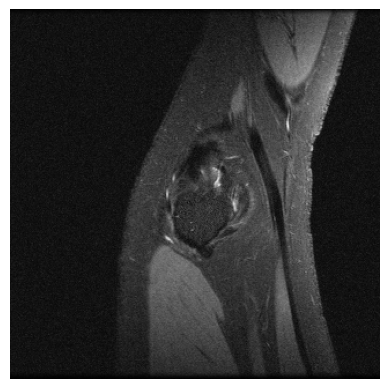

In [25]:
data_dir = '/media/hdd1/stanford_fastmri_format/'
file = train_slices[1]
slice = int(file.split('-')[0]) # slice number
f = h5py.File(data_dir + file.split('-')[-1], 'r') # volume
    
slice_ksp = f['kspace'][slice] # fully-sampled kspace (numpy complex format)
gt_im = f['reconstruction_rss'][slice] # ground truth image

plt.imshow(gt_im,cmap='gray')
plt.axis('off')
plt.show()